In [74]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import math 
import numpy as np
plt.rc("figure", figsize=(18,5))

In [75]:
def Dickey_Fuller_test(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    Dickey_Fuller_test(timeseries)
    
def plot_residuals(df):
    # plot residual erros
    residuals = pd.DataFrame(df)
    residuals.plot()
    residuals.plot(kind='kde')
    print(residuals.describe())
    (residuals*residuals).plot()
    plot_correlation(residuals*residuals)

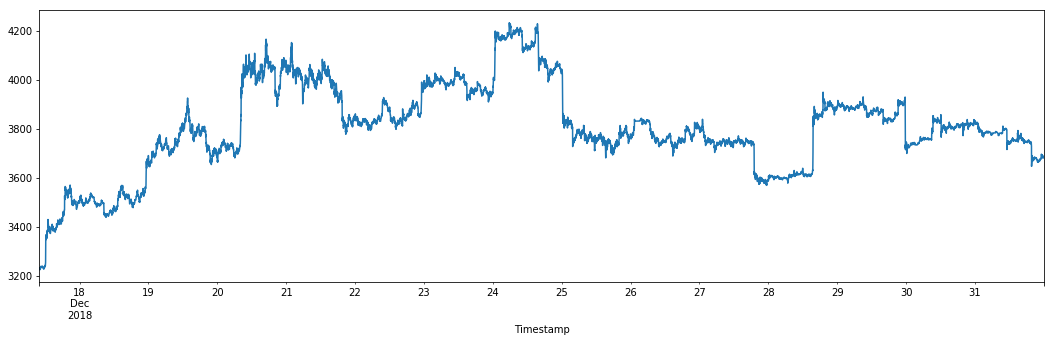

In [76]:
data = pd.read_pickle("/home/filip/Desktop/Ruđer/FinalData/distinct.pkl")
data = data.set_index("Timestamp")
data = data["Price"].tail(21000)
data.plot()

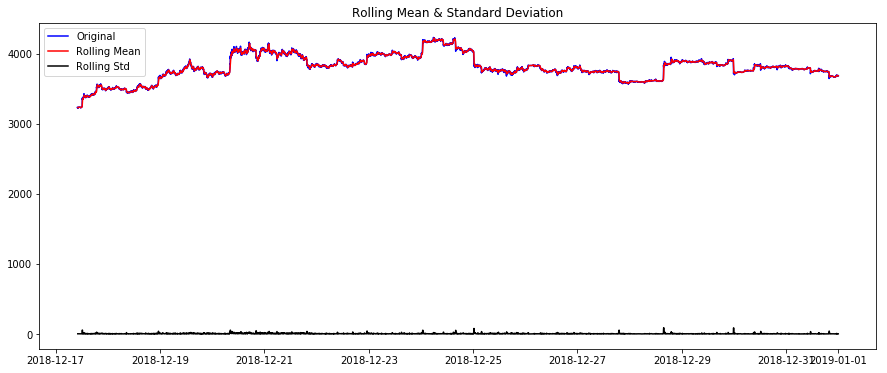

Results of Dickey-Fuller Test:
Test Statistic                    -3.346556
p-value                            0.012921
#Lags Used                        25.000000
Number of Observations Used    20974.000000
Critical Value (1%)               -3.430662
Critical Value (5%)               -2.861678
Critical Value (10%)              -2.566843
dtype: float64


In [77]:
test_stationarity(data)

In [90]:
data = data.pct_change()
data.replace([np.inf, -np.inf], np.nan).isnull().sum()
data = data.fillna(0)

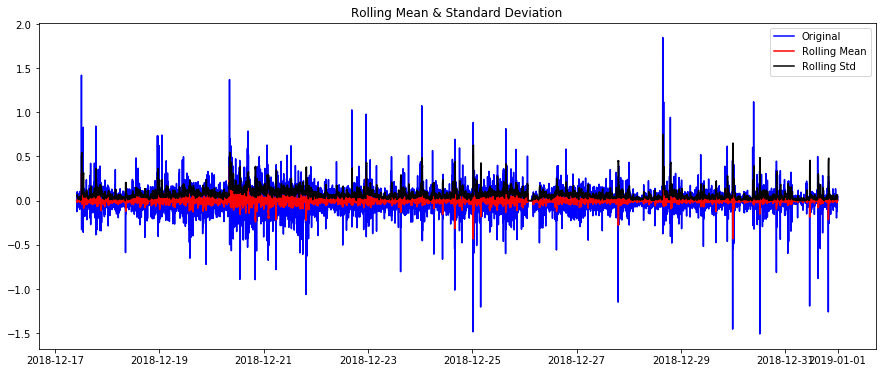

Results of Dickey-Fuller Test:
Test Statistic                   -28.055257
p-value                            0.000000
#Lags Used                        24.000000
Number of Observations Used    20975.000000
Critical Value (1%)               -3.430662
Critical Value (5%)               -2.861678
Critical Value (10%)              -2.566843
dtype: float64


In [79]:
test_stationarity(data)

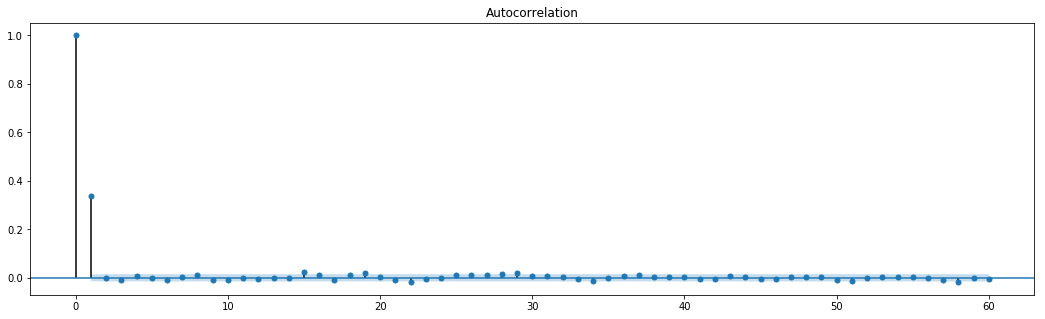

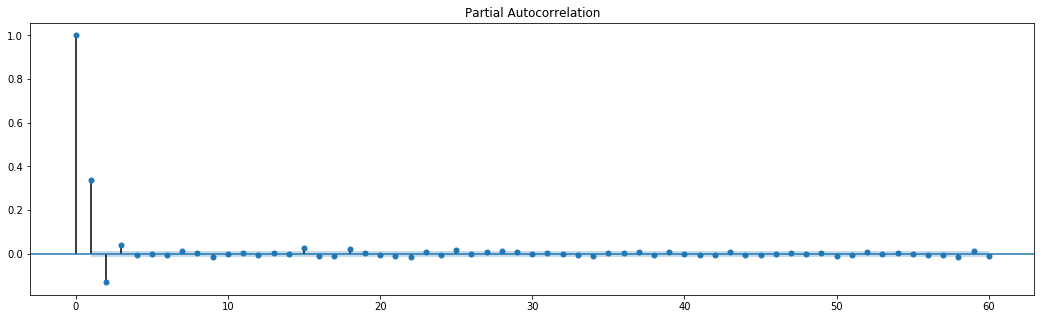

In [80]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
def plot_correlation(data):
    plot_acf(data,lags=60)
    plt.show()
    plot_pacf(data,lags=60)
    plt.show()
    
plot_correlation(data)

In [81]:
#divide into train and validation set
train = data[:-30]
train.replace([np.inf, -np.inf], np.nan).isnull().sum()
train = train.fillna(0)
test = data[-30:]
test.replace([np.inf, -np.inf], np.nan).isnull().sum()
test = test.fillna(0)

In [82]:
def get_best_model(TS):
    best = np.inf
    best_order = None
    best_mdl = None
    pq_rng = range(6) # [0,1,2,3,4]
    d = 0
    qq_rng = range(5)
    for i in pq_rng:
        for j in qq_rng:
            try:
                tmp_mdl = ARIMA(TS, order=(i,d,j)).fit(
                    method='mle', trend='nc',freq = 5
                )
                tmp_aic = tmp_mdl.aic
                tmp_bic = tmp_mdl.bic
                if tmp_aic+tmp_bic < best:
                    best_aic = tmp_aic
                    best_bic = tmp_bic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
                    print("best:",i,d,j)
            except: continue
        print(i,d,j)
    print('aic: {:6.2f} | order: {}'.format(best_aic,best_bic, best_order))                    
    return best_aic, best_order, best_mdl

In [83]:
res_tup = get_best_model(train)
print(res_tup[2].summary())

/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 0 0 1
best: 0 0 2


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 0 0 3


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 0 0 4
0 0 4
best: 1 0 0


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 1 0 1


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 1 0 2


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 1 0 3


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 1 0 4
1 0 4
best: 2 0 0


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 2 0 1


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 2 0 2


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 2 0 3


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 2 0 4
2 0 4
best: 3 0 0


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 3 0 1


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 3 0 2


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 3 0 3


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


3 0 4
best: 4 0 0


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 4 0 1


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 4 0 2


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 4 0 3


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 4 0 4
4 0 4


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 5 0 0


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 5 0 1


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 5 0 2


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


best: 5 0 3


/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


5 0 4
aic: -38356.62 | order: -38285.06577535722
                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                20970
Model:                     ARMA(5, 3)   Log Likelihood               19187.312
Method:                           mle   S.D. of innovations              0.097
Date:                Wed, 28 Aug 2019   AIC                         -38356.623
Time:                        22:27:47   BIC                         -38285.066
Sample:                    12-17-2018   HQIC                        -38333.266
                         - 12-31-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Price    -1.2533      0.179     -7.018      0.000      -1.603      -0.903
ar.L2.Price    -0.4482      0.228     -1.966      0.049      -0.895      -0.001

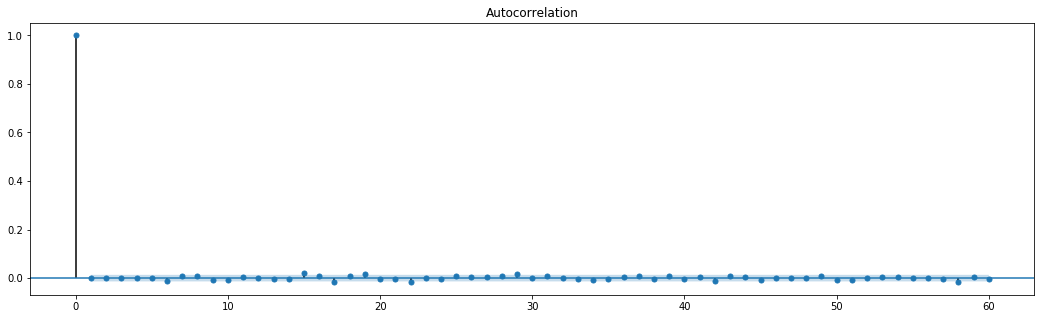

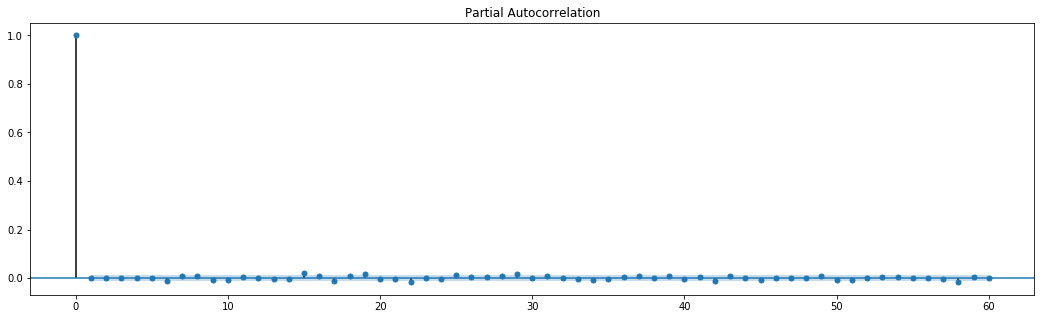

In [84]:
plot_correlation(res_tup[2].resid)
order = res_tup[1]
model = res_tup[2]

                  0
count  20970.000000
mean       0.000494
std        0.096915
min       -1.448957
25%       -0.029195
50%        0.000251
75%        0.030413
max        1.583617


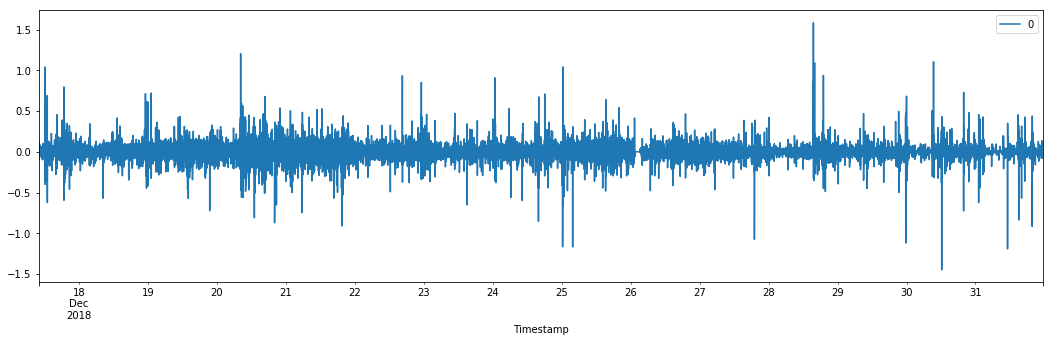

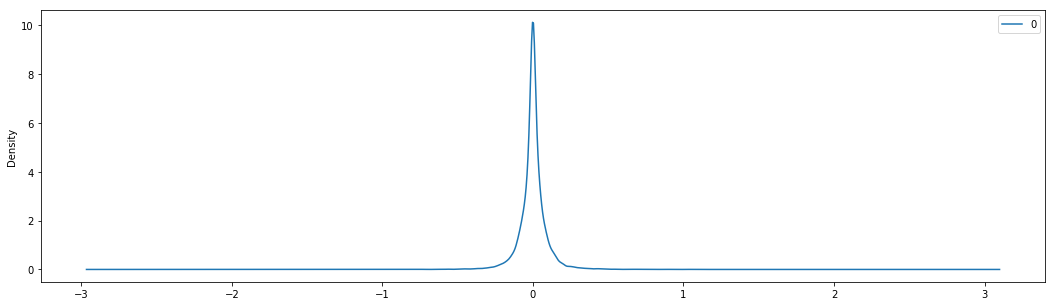

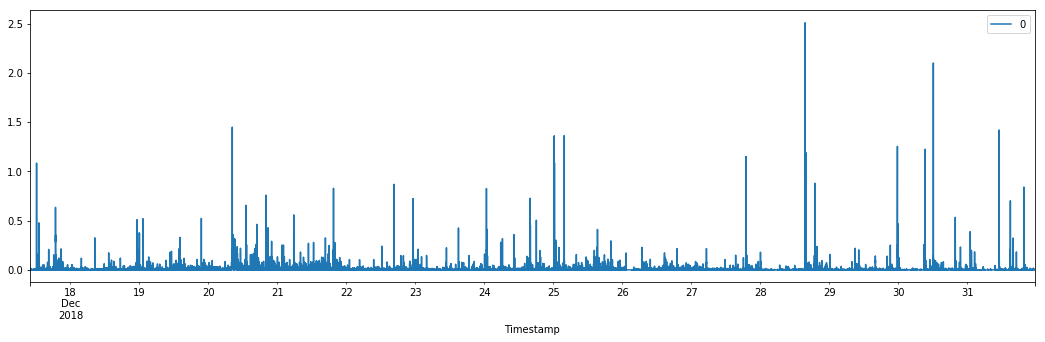

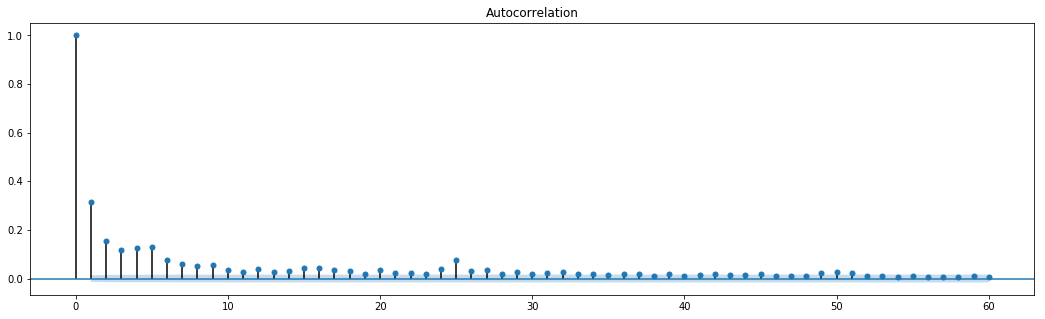

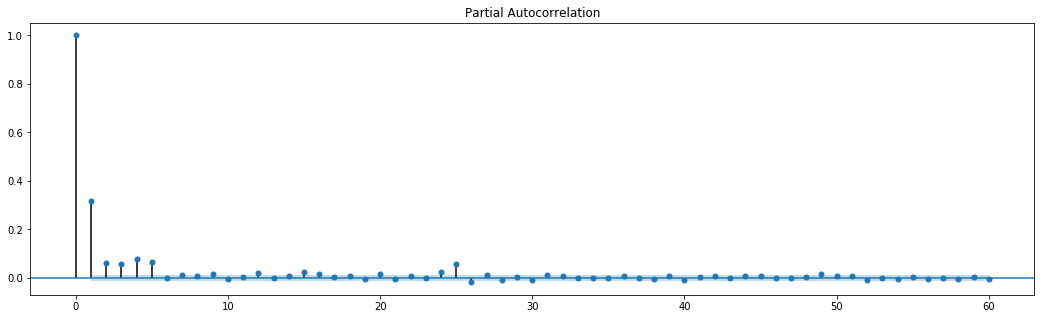

In [85]:
plot_residuals(model.resid)

In [86]:
from arch import arch_model
p_ = order[0]
o_ = order[1]
q_ = order[2]
print(p_,o_,q_)
# Using student T distribution usually provides better fit
am = arch_model(model.resid,dist='Normal',p=p_, o=o_, q=q_)
res = am.fit(disp='off',update_freq=5)
print(res.summary())

5 0 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                23073.0
Distribution:                  Normal   AIC:                          -46126.0
Method:            Maximum Likelihood   BIC:                          -46046.5
                                        No. Observations:                20970
Date:                Wed, Aug 28 2019   Df Residuals:                    20960
Time:                        22:28:02   Df Model:                           10
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.0194e-04  4.468e-04      1.347      

/home/filip/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:571: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


              resid
count  20970.000000
mean      -0.000108
std        0.096915
min       -1.449559
25%       -0.029796
50%       -0.000351
75%        0.029811
max        1.583015


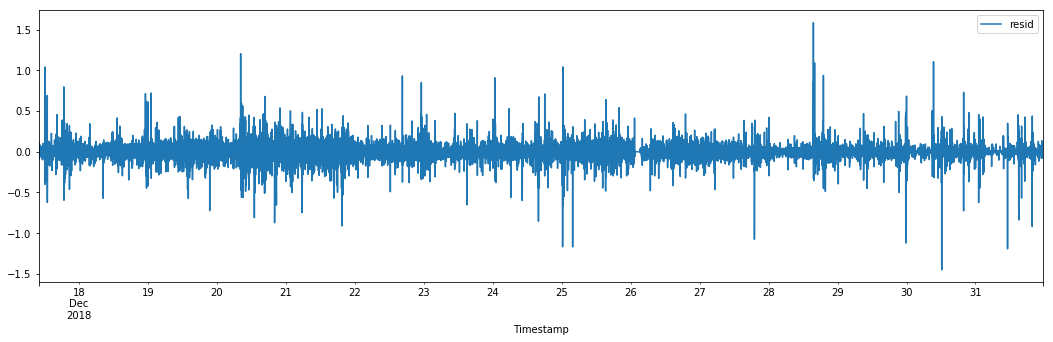

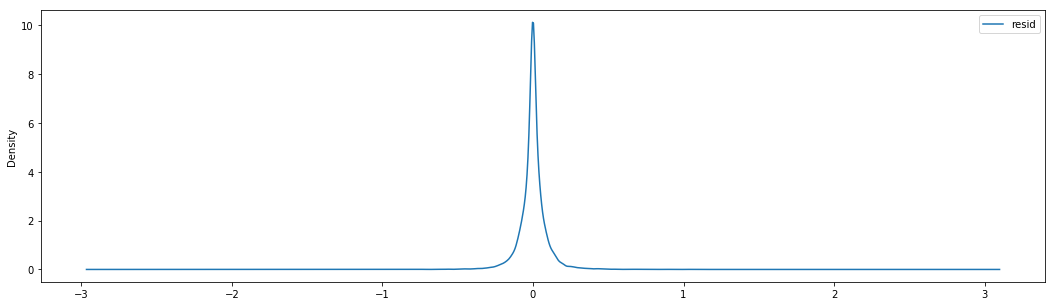

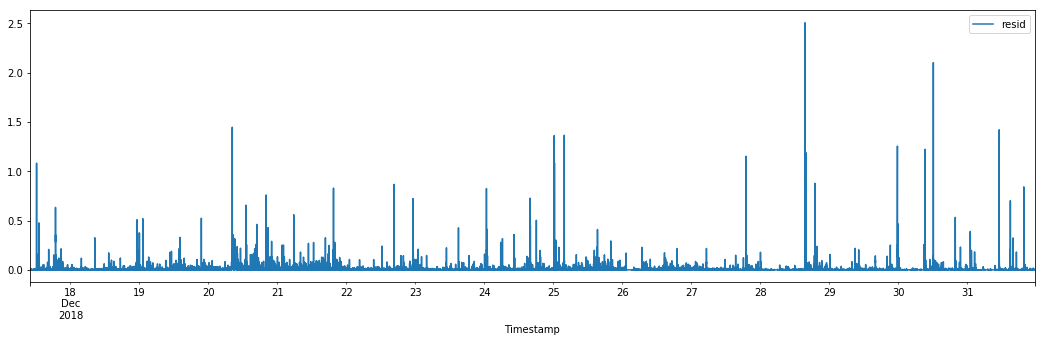

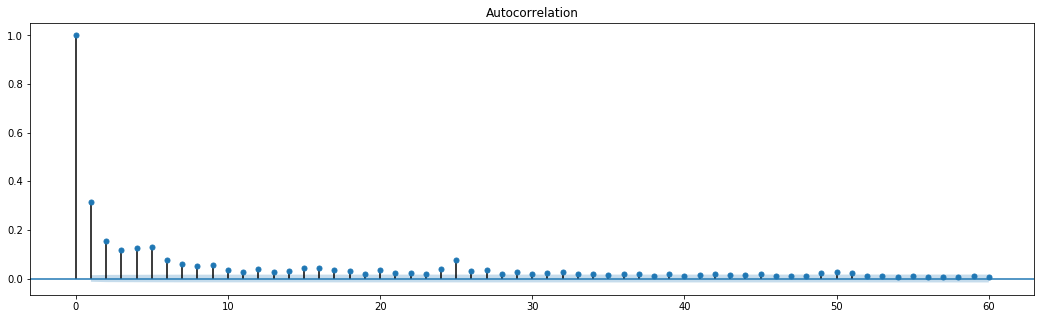

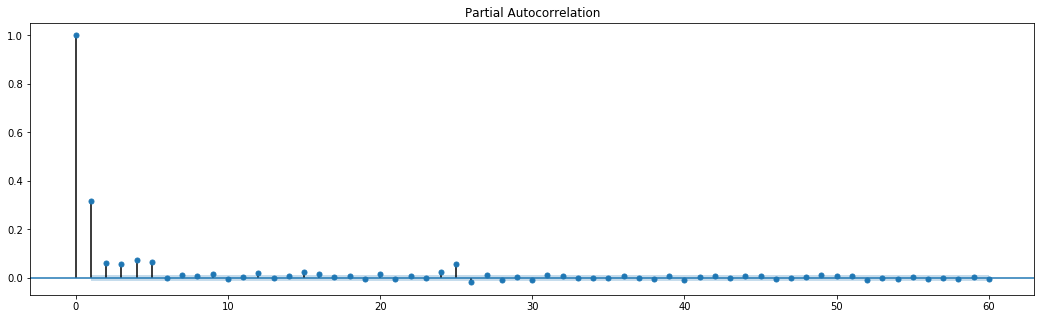

In [87]:
plot_residuals(res.resid)

In [88]:
history = [x for x in train]
print(len(test))
predictions = []
p_ = order[0]
o_ = order[1]
q_ = order[2]
for t in range(len(test)):
    obs = test[t]
    #Arima model fitting
    model = ARIMA(history, order=(4,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    
    #Results
    residuals = model_fit.resid
    yhat = output[0]
    
    #Appending results
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

"""
    Fitting GARCH model
    am = arch_model(residuals,dist='StudentsT',p=p_, o=o_, q=q_)
    res = am.fit(disp='off',update_freq=60)
    result = res.forecast()
    
    variance = math.sqrt(result.variance.iloc[-1].values[0])
    mean = result.mean.iloc[-1].values[0]
    #Appending results
    signal_variance.append(variance)
    signal_mean.append(mean)
    
    print("Mean: %f,  Variance: %f" %(mean,math.sqrt(variance)))
"""


30
predicted=-0.008122, expected=-0.088952
predicted=-0.030575, expected=-0.195890
predicted=-0.063888, expected=-0.007090
predicted=0.023346, expected=0.039127
predicted=0.008424, expected=0.002927
predicted=-0.003308, expected=0.015418
predicted=0.006718, expected=0.052628
predicted=0.019572, expected=0.015893
predicted=-0.001199, expected=0.041083
predicted=0.017029, expected=0.016910
predicted=0.000745, expected=-0.011871
predicted=-0.004063, expected=-0.007842
predicted=-0.001125, expected=-0.042246
predicted=-0.014398, expected=-0.009575
predicted=0.001834, expected=-0.001865
predicted=0.000231, expected=-0.008993
predicted=-0.003737, expected=-0.002700
predicted=0.001333, expected=-0.008025
predicted=-0.003241, expected=0.007368
predicted=0.005079, expected=-0.003892
predicted=-0.003077, expected=-0.121335
predicted=-0.045180, expected=0.022631
predicted=0.026312, expected=0.033515
predicted=0.005731, expected=-0.016058
predicted=-0.009741, expected=0.032727
predicted=0.016929, 

/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/filip/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


LinAlgError: SVD did not converge

Test MSE: 0.0014269127


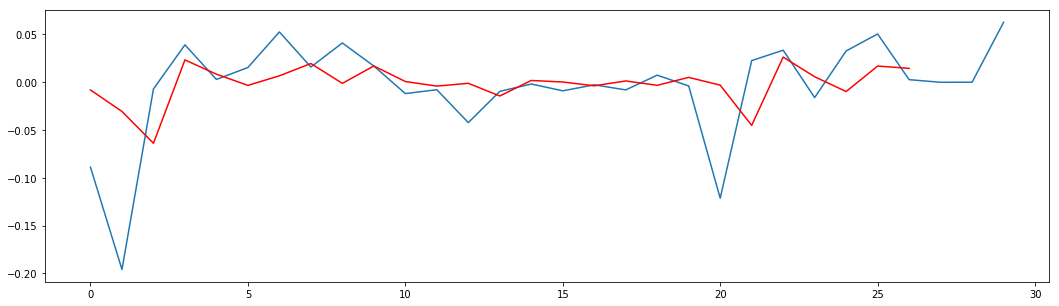

In [89]:
print('Test MSE: %.10f' % error)
plt.plot(test.values)
plt.plot(predictions, color='red')